In [11]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [12]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [13]:
# hyper parameters
input_size = 784 # 28 x 28
hideen_size = 100
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])
torch.Size([100, 1, 28, 28]) torch.Size([100])


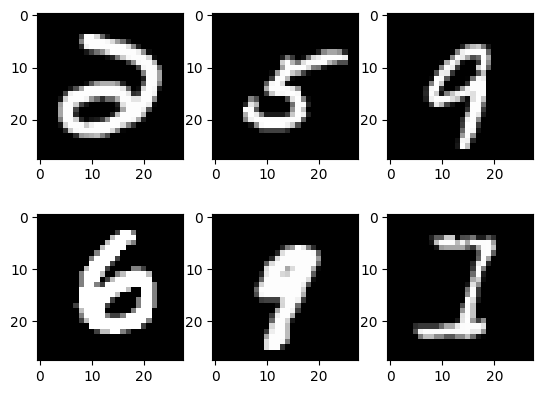

In [14]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())
# print the size of the train_dataset.
print(train_dataset.data.size())
print(test_dataset.data.size())


train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

examples = iter(train_loader)
samples, labels = next(examples)

print(samples.shape, labels.shape)

for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(samples[i][0], cmap='gray')
    
plt.show()

In [15]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        outp = self.l2(out)
        return out
    
model = NeuralNet(input_size, hideen_size, num_classes).to(device)

## loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

## training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 100, 1, 28, 28
        # 100, 784
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # forward
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print(f'epoch {epoch+1}/{num_epochs} step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')

epoch 1/5 step 100/600, loss = 2.2531
epoch 1/5 step 200/600, loss = 1.8215
epoch 1/5 step 300/600, loss = 1.4603
epoch 1/5 step 400/600, loss = 1.2436
epoch 1/5 step 500/600, loss = 0.9960
epoch 1/5 step 600/600, loss = 1.4769
epoch 2/5 step 100/600, loss = 1.7393
epoch 2/5 step 200/600, loss = 1.2213
epoch 2/5 step 300/600, loss = 1.2690
epoch 2/5 step 400/600, loss = 1.0843
epoch 2/5 step 500/600, loss = 0.9715
epoch 2/5 step 600/600, loss = 0.9626
epoch 3/5 step 100/600, loss = 1.0517
epoch 3/5 step 200/600, loss = 1.1084
epoch 3/5 step 300/600, loss = 1.2624
epoch 3/5 step 400/600, loss = 1.2260
epoch 3/5 step 500/600, loss = 1.1254
epoch 3/5 step 600/600, loss = 1.0624
epoch 4/5 step 100/600, loss = 1.2723
epoch 4/5 step 200/600, loss = 1.2671
epoch 4/5 step 300/600, loss = 1.0968
epoch 4/5 step 400/600, loss = 0.9730
epoch 4/5 step 500/600, loss = 1.3389
epoch 4/5 step 600/600, loss = 1.1040
epoch 5/5 step 100/600, loss = 1.1954
epoch 5/5 step 200/600, loss = 1.1841
epoch 5/5 st

In [16]:
# test
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)        
        
        outputs = model(images)
        
        # value, index
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct = (predictions == labels).sum().item()
        
acc = 100.0 * n_correct / n_samples
print(f'Accuracy = {acc}')        

Accuracy = 0.72
